In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [15]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
Data[:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [16]:
Target = [(i+5)/100 for i in range (100)]
Target[:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [17]:
data = np.array(Data, dtype = float)
target = np.array(Target, dtype = float)

In [18]:
data.shape, target.shape

((100, 5, 1), (100,))

In [19]:
# Dividing data into train and test
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 4)

In [20]:
# RNN
model = Sequential()

In [21]:
model.add(LSTM((1), batch_input_shape = (None, 5, 1), return_sequences = False))

In [22]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, epochs = 1000, validation_data = (x_test, y_test))

Epoch 1/1000
3/3 [==============================] - 0s 80ms/step - loss: 0.3054 - accuracy: 0.0000e+00 - val_loss: 0.2123 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3030 - accuracy: 0.0000e+00 - val_loss: 0.2104 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3009 - accuracy: 0.0000e+00 - val_loss: 0.2085 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.2987 - accuracy: 0.0000e+00 - val_loss: 0.2067 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.2964 - accuracy: 0.0000e+00 - val_loss: 0.2048 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.2944 - accuracy: 0.0000e+00 - val_loss: 0.2031 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.2922 - accuracy: 0.0000e+00 - v

In [29]:
results = model.predict(x_test)

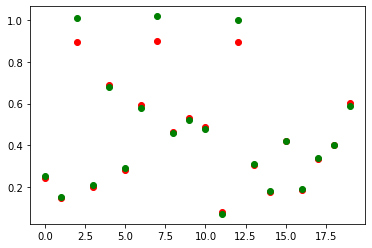

In [30]:
plt.scatter(range(20), results, c= 'r')
plt.scatter(range(20), y_test, c= 'g')
plt.show()

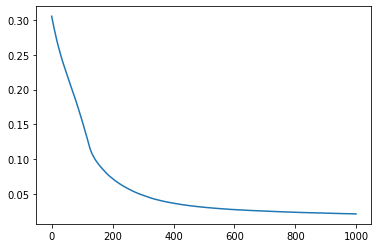

In [31]:
plt.plot(history.history['loss'])
plt.show()